<h1><center>Rossman Store Sales Predictions</center></h1>


In [2]:
#Loading libraries
import pandas as pd
import numpy as np

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.17763-SP0
Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
NumPy 1.16.5
SciPy 1.4.1
Scikit-Learn 0.22.2.post1


In [5]:
drug_train = pd.read_csv('train.csv')
drug_store = pd.read_csv('store.csv')                         

C:\Users\hanit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
drug_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
drug_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
drug_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
#Filling na values with '0' for CompetitionOpenSinceMonth,CompetitionOpenSinceYear columns 
drug_store["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
drug_store['CompetitionOpenSinceYear'].fillna(0, inplace=True)
drug_store['Promo2SinceWeek'].fillna(0, inplace=True)
drug_store['Promo2SinceYear'].fillna(0, inplace=True)
drug_store['PromoInterval'].fillna(0, inplace=True)
drug_store['CompetitionDistance'].fillna(0, inplace=True)

In [10]:
drug_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [11]:
drug_store.shape, drug_train.shape

((1115, 10), (1017209, 9))

In [12]:
drug_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Sorting data 

In [13]:
print("Number of open and closed days",'\n', drug_train.Open.value_counts())

Number of open and closed days 
 1    844392
0    172817
Name: Open, dtype: int64


In [14]:
nosale1 = drug_train[drug_train['Sales']==0]

In [15]:
nosale1.shape

(172871, 9)

In [16]:
nosale1.groupby('Open')['Sales'].count()

Open
0    172817
1        54
Name: Sales, dtype: int64

#### Observation
- Closed stores and no sales data points doesnot make any sense in keeping 



In [17]:
#Dropping observation of no sales and closed stores
drug_train = drug_train.drop(drug_train[(drug_train.Open == 0) & (drug_train.Sales == 0)].index)

In [18]:
drug_train.shape

(844392, 9)

In [19]:
drug_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1


In [20]:
#Resetting index to make the data in a sequence
drug_train = drug_train.reset_index(drop=True)

In [21]:
drug_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
844387,682,2,2013-01-01,3375,566,1,0,a,1
844388,733,2,2013-01-01,10765,2377,1,0,a,1
844389,769,2,2013-01-01,5035,1248,1,0,a,1
844390,948,2,2013-01-01,4491,1039,1,0,a,1
844391,1097,2,2013-01-01,5961,1405,1,0,a,1


### 5 Number analysis 

#### Target variable(Sales)

In [22]:
drug_train.Sales.describe()

count    844392.000000
mean       6955.514291
std        3104.214680
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

### Observation
- From 5 number summary we can see that mean and median(50%) sales 6955 and 6369 respectively, it means that mean is not  getting affected more

#### Customer feature


In [23]:
drug_train.Customers.describe()

count    844392.000000
mean        762.728395
std         401.227674
min           0.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

In [24]:
drug_train[drug_train.Customers>5000].count()

Store            19
DayOfWeek        19
Date             19
Sales            19
Customers        19
Open             19
Promo            19
StateHoliday     19
SchoolHoliday    19
dtype: int64

In [25]:
drug_train[drug_train.Customers>6000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
825213,817,2,2013-01-22,27190,7388,1,1,0,0


#### Observation
- Customer's mean, median and even 75% of data points within the range and >6000 also only one row

## Merging store and train dataset

In [26]:
#on which variable i can merge?
drug_train.Store.nunique(), drug_store.Store.nunique()

(1115, 1115)

In [27]:
merged_df = pd.merge(drug_train,drug_store, how='left', on='Store')

In [28]:
merged_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [29]:
merged_df.shape

(844392, 18)

In [30]:
#Getting unique values of each attributes
for i in merged_df.columns:
    print('Number of unique values in {} column are {} \n The unique values are {}'. format(i, len(merged_df[i].unique()), merged_df[i].unique()))
    print('-------------------------------\n')

Number of unique values in Store column are 1115 
 The unique values are [   1    2    3 ... 1115  876  292]
-------------------------------

Number of unique values in DayOfWeek column are 7 
 The unique values are [5 4 3 2 1 7 6]
-------------------------------

Number of unique values in Date column are 942 
 The unique values are ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '20

Number of unique values in SchoolHoliday column are 2 
 The unique values are [1 0]
-------------------------------

Number of unique values in StoreType column are 4 
 The unique values are ['c' 'a' 'd' 'b']
-------------------------------

Number of unique values in Assortment column are 3 
 The unique values are ['a' 'c' 'b']
-------------------------------

Number of unique values in CompetitionDistance column are 655 
 The unique values are [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.

In [31]:
merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [32]:
merged_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Feature Engineering

In [33]:
#Checking what is the customer, sales ratio
merged_df['SalesPerCustomer'] = merged_df['Sales']/merged_df['Customers']

## Type conversion

#### Handling date attribute

In [34]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [35]:
merged_df.Date.dtypes

dtype('<M8[ns]')

In [36]:
#Creating Month and Year features from Date column
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year
merged_df['Day'] = merged_df.Date.dt.weekday

In [37]:
merged_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesPerCustomer,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,9.482883,7,2015,4
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2015,4


In [38]:
merged_df.Year.unique()

array([2015, 2014, 2013], dtype=int64)

### Handling categorical attribute

### Changing to category

In [39]:
merged_df['SchoolHoliday'] = merged_df['SchoolHoliday'].astype('category')
merged_df['Assortment'] = merged_df['Assortment'].astype('category')
merged_df['StoreType'] = merged_df['StoreType'].astype('category')
merged_df['PromoInterval']= merged_df['PromoInterval'].astype('category')
merged_df['Promo']= merged_df['Promo'].astype('category')
merged_df['Promo2']= merged_df['Promo2'].astype('category')
merged_df['SchoolHoliday']= merged_df['SchoolHoliday'].astype('category')

In [40]:
#To know that chaging category is properly done
merged_df['code1'] = merged_df['Assortment'].cat.codes

In [41]:
merged_df.code1.unique(), merged_df.Assortment.unique()

(array([0, 2, 1], dtype=int64), [a, c, b]
 Categories (3, object): [a, c, b])

#### CompetetionDistance feature understanding

In [42]:
merged_df.CompetitionDistance.nunique(), merged_df.CompetitionDistance.min(), merged_df.CompetitionDistance.max()

(655, 0.0, 75860.0)

In [43]:
#Binning the CompetitionDistance, because of 655 unique values and range also so high
merged_df['CompetitionDistance_Bin'] = pd.cut(merged_df['CompetitionDistance'],5)

In [44]:
#merged_df.to_csv('DataWithBinning1.csv',index=False)

In [45]:
#merged_df = pd.read_csv('DataWithBinning1.csv')

In [46]:
#Grouping with sales to get to know the relation
merged_df.groupby(by="CompetitionDistance_Bin").Sales.mean()

CompetitionDistance_Bin
(-75.86, 15172.0]     6956.881474
(15172.0, 30344.0]    7041.417293
(30344.0, 45516.0]    6471.923562
(45516.0, 60688.0]    5980.114445
(60688.0, 75860.0]    7775.446449
Name: Sales, dtype: float64

#### Observation
- If the distance is high sales also high, positive relation


### Droping unwanted columns

In [47]:
merged_df.shape

(844392, 24)

In [48]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'SalesPerCustomer', 'Month', 'Year',
       'Day', 'code1', 'CompetitionDistance_Bin'],
      dtype='object')

In [49]:
del merged_df["CompetitionDistance_Bin"]
del merged_df['Date']
del merged_df['Open']
del merged_df['Customers']
del merged_df['code1']
del merged_df['SalesPerCustomer']

In [50]:
merged_df.shape

(844392, 18)

In [51]:
#Visualization plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

,Store,DayOfWeek,Sales,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day
Store,1.000000,0.000346,0.007710,-0.027117,-0.032555,-0.008152,0.010857,0.007768,0.001365,0.000301,0.000346
DayOfWeek,0.000346,1.000000,-0.178736,0.005536,-0.000834,-0.001303,-0.002736,-0.003238,-0.019723,0.002102,1.000000
Sales,0.007710,-0.178736,1.000000,-0.035469,-0.018370,0.005266,-0.058476,-0.127621,0.073600,0.036169,-0.178736
CompetitionDistance,-0.027117,0.005536,-0.035469,1.000000,-0.031181,-0.000086,-0.123433,-0.140990,0.003919,0.000639,0.005536
CompetitionOpenSinceMonth,-0.032555,-0.000834,-0.018370,-0.031181,1.000000,0.785326,-0.109522,-0.082488,-0.001328,-0.000532,-0.000834
CompetitionOpenSinceYear,-0.008152,-0.001303,0.005266,-0.000086,0.785326,1.000000,-0.125080,-0.098503,-0.000758,-0.000156,-0.001303
Promo2SinceWeek,0.010857,-0.002736,-0.058476,-0.123433,-0.109522,-0.125080,1.000000,0.759337,-0.031717,-0.006904,-0.002736
Promo2SinceYear,0.007768,-0.003238,-0.127621,-0.140990,-0.082488,-0.098503,0.759337,1.000000,-0.025822,-0.005703,-0.003238
Month,0.001365,-0.019723,0.073600,0.003919,-0.001328,-0.000758,-0.031717,-0.025822,1.000000,-0.268819,-0.019723
Year,0.000301,0.002102,0.036169,0.000639,-0.000532,-0.000156,-0.006904,-0.005703,-0.268819,1.000000,0.002102


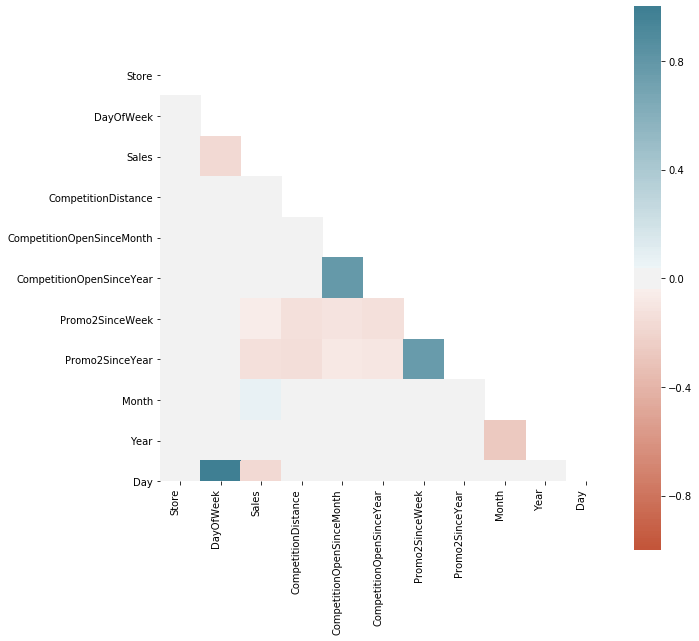

In [52]:
#  Correlation plot to determine the togetherness of the features

upper_triangle = np.zeros_like(merged_df.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True

fig, ax = plt.subplots(figsize=(10,10))
corr = merged_df.corr()
ax = sns.heatmap(
    corr, mask=upper_triangle,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

corr

#sns.heatmap(df_correlation.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))

### Observation
-  0.82 between Customers and sales which suggests that they are positively correlated 
- It's interesting that SalesperCustomer and Promo (0.28) actually correlate positively, since running a promotion increases that number and positive correlation with Competition Distance(0.21)
- StoreType does play a major role with Sales per Customer (0.44)

In [53]:
# merged_df['CompetitionOpen'] = np.where((merged_df['CompetitionOpenSinceMonth']==0) & (merged_df['CompetitionOpenSinceYear']==0),0,
#                                         (merged_df.Month - merged_df.CompetitionOpenSinceMonth) + 
#                                        (12 * (merged_df.Year - merged_df.CompetitionOpenSinceYear)) )

In [54]:
# del merged_df['CompetitionOpenSinceYear']
# del merged_df['CompetitionOpenSinceMonth']

## Getting features in mechine acceptable(vector) form

### Handling categorical features

In [55]:
#merged_df["PromoInterval"] = merged_df["PromoInterval"].astype("category")

In [56]:
merged_df.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Promo                        category
StateHoliday                   object
SchoolHoliday                category
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                       category
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
Month                           int64
Year                            int64
Day                             int64
dtype: object

In [57]:
#Changing Promation interval feature's level into convient way
merged_df.PromoInterval.unique()

[0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,Sept,Dec]
Categories (4, object): [0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,Sept,Dec]

In [58]:
merged_df["PromoInterval"] = merged_df['PromoInterval'].map({"0": "IntervalZero", "Jan,Apr,Jul,Oct": 'FirstInterval', "Feb,May,Aug,Nov": 'secondInterval', "Mar,Jun,Sept,Dec": 'ThirdInterval',0:"IntervalZero"})

In [59]:
merged_df.PromoInterval.unique()

[IntervalZero, FirstInterval, secondInterval, ThirdInterval]
Categories (4, object): [IntervalZero, FirstInterval, secondInterval, ThirdInterval]

In [60]:
merged_df["StateHoliday"] = merged_df["StateHoliday"].astype("category")

In [61]:
merged_df.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Promo                        category
StateHoliday                 category
SchoolHoliday                category
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                       category
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
Month                           int64
Year                            int64
Day                             int64
dtype: object

In [62]:
merged_df.StateHoliday.unique()

[0, a, b, c, 0]
Categories (5, object): [0, a, b, c, 0]

In [63]:
#Mapping Stateholiday feature in order to consider as numerical attribute
merged_df["StateHoliday"] = merged_df['StateHoliday'].map({"0": "0", "a": "1", "b": "1", "c": "1", 0:"0"})

In [64]:
merged_df.StateHoliday.unique(),merged_df.StateHoliday.isnull().sum()

(array(['0', '1'], dtype=object), 0)

In [65]:
merged_df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Month                        0
Year                         0
Day                          0
dtype: int64

In [66]:
#Filling null values
# merged_df["StateHoliday"].fillna(0, inplace = True)
#merged_df["SalesPerCustomer"].fillna(0, inplace = True)
# merged_df['PromoInterval'].fillna(0, inplace=True)

In [67]:
merged_df.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Promo                        category
StateHoliday                   object
SchoolHoliday                category
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                       category
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
Month                           int64
Year                            int64
Day                             int64
dtype: object

In [68]:
merged_df['StateHoliday'] = merged_df['StateHoliday'].astype('category')

In [69]:
merged_df.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Promo                        category
StateHoliday                 category
SchoolHoliday                category
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                       category
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
Month                           int64
Year                            int64
Day                             int64
dtype: object

In [70]:
merged_df=pd.get_dummies(merged_df, columns=["StateHoliday","Assortment","StoreType","PromoInterval","SchoolHoliday",'Promo','Promo2'])

In [71]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Year', 'Day',
       'StateHoliday_0', 'StateHoliday_1', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'PromoInterval_IntervalZero',
       'PromoInterval_secondInterval', 'PromoInterval_FirstInterval',
       'PromoInterval_ThirdInterval', 'SchoolHoliday_0', 'SchoolHoliday_1',
       'Promo_0', 'Promo_1', 'Promo2_0', 'Promo2_1'],
      dtype='object')

### Handling of Numerical features

#### Standarizing Numerical attributes

In [72]:
#Have to exclude target variable from standarizing
merged_df['Sales'] = merged_df['Sales'].astype('category')
merged_df['Month'] = merged_df['Month'].astype('category')
merged_df['Day'] = merged_df['Day'].astype('category')

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [74]:
#Creating scaler object
scaler = StandardScaler()

In [75]:
numAttributes = merged_df.select_dtypes(['int64','float64']).columns

In [76]:
print(numAttributes)

Index(['Store', 'DayOfWeek', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year'],
      dtype='object')


In [77]:
scaler.fit(merged_df[numAttributes])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
merged_df[numAttributes]=scaler.transform(merged_df[numAttributes])

In [79]:
#Converting back to numerical 
merged_df['Sales'] = merged_df['Sales'].astype('int64')
merged_df['Month'] = merged_df['Month'].astype('int64')
merged_df['Day'] = merged_df['Day'].astype('int64')

In [80]:
merged_df.head()

,Store,DayOfWeek,Sales,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Month,Year,...,PromoInterval_IntervalZero,PromoInterval_secondInterval,PromoInterval_FirstInterval,PromoInterval_ThirdInterval,SchoolHoliday_0,SchoolHoliday_1,Promo_0,Promo_1,Promo2_0,Promo2_1
0,-1.732571,0.858414,5263,-0.534818,0.950941,0.682279,-0.757527,-0.997371,7,1.502796,...,1,0,0,0,0,1,0,1,1,0
1,-1.729462,0.858414,6064,-0.624512,1.417831,0.681210,0.091710,1.000890,7,1.502796,...,0,0,1,0,0,1,0,1,0,1
2,-1.726354,0.858414,8314,1.113003,1.651277,0.680142,0.157036,1.001885,7,1.502796,...,0,0,1,0,0,1,0,1,0,1
3,-1.723246,0.858414,13995,-0.618106,0.950941,0.683348,-0.757527,-0.997371,7,1.502796,...,1,0,0,0,0,1,0,1,1,0
4,-1.720138,0.858414,4822,3.134979,-0.216285,0.689761,-0.757527,-0.997371,7,1.502796,...,1,0,0,0,0,1,0,1,1,0


[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'Sales'),
 Text(0.5, 1.0, 'Sales Distribution')]

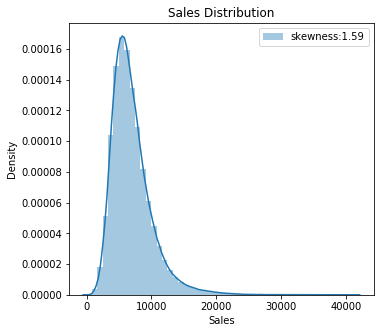

In [81]:
#check distribution of sales 
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
sa = sns.distplot(merged_df['Sales'],hist = True,label='skewness:{:.2f}'.format(merged_df['Sales'].skew()),ax = ax)
sa.legend()
sa.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
merged_df.Sales.isnull().sum()

0

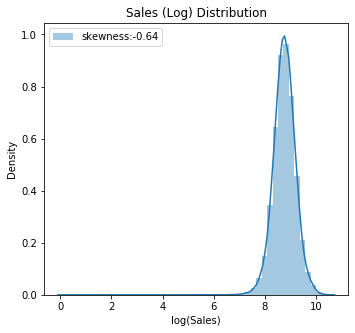

In [84]:
## check distribution of sales 
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(122)
sa1 = sns.distplot(np.log1p(merged_df['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(merged_df['Sales']).skew()),ax=ax)
sa1.legend()
sa1.set(xlabel = 'log(Sales)',ylabel = 'Density', title = 'Sales (Log) Distribution')
plt.show()

In [85]:
#del merged_df['CompetitionDistance']
# del merged_df['Customers']
# del merged_df['SalesPerCustomer']

In [86]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Year', 'Day',
       'StateHoliday_0', 'StateHoliday_1', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'PromoInterval_IntervalZero',
       'PromoInterval_secondInterval', 'PromoInterval_FirstInterval',
       'PromoInterval_ThirdInterval', 'SchoolHoliday_0', 'SchoolHoliday_1',
       'Promo_0', 'Promo_1', 'Promo2_0', 'Promo2_1'],
      dtype='object')

In [87]:
merged_df.shape

(844392, 30)

In [88]:
x = merged_df.drop('Sales', axis=1)
y = merged_df.Sales

In [89]:
x.head()

,Store,DayOfWeek,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,...,PromoInterval_IntervalZero,PromoInterval_secondInterval,PromoInterval_FirstInterval,PromoInterval_ThirdInterval,SchoolHoliday_0,SchoolHoliday_1,Promo_0,Promo_1,Promo2_0,Promo2_1
0,-1.732571,0.858414,-0.534818,0.950941,0.682279,-0.757527,-0.997371,7,1.502796,4,...,1,0,0,0,0,1,0,1,1,0
1,-1.729462,0.858414,-0.624512,1.417831,0.681210,0.091710,1.000890,7,1.502796,4,...,0,0,1,0,0,1,0,1,0,1
2,-1.726354,0.858414,1.113003,1.651277,0.680142,0.157036,1.001885,7,1.502796,4,...,0,0,1,0,0,1,0,1,0,1
3,-1.723246,0.858414,-0.618106,0.950941,0.683348,-0.757527,-0.997371,7,1.502796,4,...,1,0,0,0,0,1,0,1,1,0
4,-1.720138,0.858414,3.134979,-0.216285,0.689761,-0.757527,-0.997371,7,1.502796,4,...,1,0,0,0,0,1,0,1,1,0


### Train-test split


In [90]:
x.shape

(844392, 29)

In [91]:
y.shape

(844392,)

In [92]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.20,random_state=123)

In [93]:
print("Number of observation in traing data is = ", x_train.shape)
print("Number of observation in validation data is = ", x_val.shape)

Number of observation in traing data is =  (675513, 29)
Number of observation in validation data is =  (168879, 29)


# Model building

### RandomForest

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
# Create the model with 50 trees
Classifier_RF = RandomForestRegressor(criterion='mse',n_estimators=50,max_depth=50,bootstrap =True,max_features ='auto',
                                     min_samples_leaf=2,random_state=123)

#Classifier_RF = RandomForestRegressor()

In [96]:
# rfr = RandomForestRegressor(n_estimators=10, 
#                              criterion='mse', 
#                              max_depth=5, 
#                              min_samples_split=2, 
#                              min_samples_leaf=1, 
#                              min_weight_fraction_leaf=0.0, 
#                              max_features='auto', 
#                              max_leaf_nodes=None, 
#                              min_impurity_decrease=0.0, 
#                              min_impurity_split=None, 
#                              bootstrap=True, 
#                              oob_score=False,
#                              n_jobs=4,
#                              random_state=31, 
#                              verbose=0, 
#                              warm_start=False)

In [97]:
Classifier_RF.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [98]:
RF_train_pred = Classifier_RF.predict(x_train)

In [99]:
#Creating function for rmspe
def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean( (y - yhat)**2))
    return rmspe

In [100]:
Error_Metrics=rmspe(y_train,RF_train_pred)
Error_Metrics

722.6151279019887

#### RF prediction on validation

In [101]:
#Predicting on validation
RF_val_pred = Classifier_RF.predict(x_val)

In [102]:
Error_Metrics_val=rmspe(y_val,RF_val_pred)
Error_Metrics_val

1029.7946248569297

- RandomForest model is overfitting, so triyng with DecisionTree

# Test_Data

In [103]:
test = pd.read_csv('test.csv')

In [104]:
test.shape

(41088, 8)

In [105]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [106]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [107]:
test.Open.nunique()

2

In [108]:
# df_test.fillna(1, inplace = True) #11rows with Nans decided to leave them open since its one store 622 which is 
# #usually open
# #Left-join the train to the store dataset since .Why?
# #Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
# df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')
# print ("The Test_Store dataset has {} Rows and {} Variables".format(str(df_test_store.shape[0]),str(df_test_store.shape[1]))) 
# df_test_store['Month']=df_test_store.Date.dt.month
# df_test_store['Year']=df_test_store.Date.dt.year
# df_test_store['Day']=df_test_store.Date.dt.day

# df_test_store['StateHoliday'] = df_test_store['StateHoliday'].astype('category')
# df_test_store['Assortment'] = df_test_store['Assortment'].astype('category')
# df_test_store['StoreType'] = df_test_store['StoreType'].astype('category')
# df_test_store['PromoInterval']= df_test_store['PromoInterval'].astype('category')
# df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday'].cat.codes

In [109]:
test.fillna(1, inplace = True) 

In [110]:
df_test = pd.merge(test,drug_store, how='left', on='Store')
df_test.shape

(41088, 17)

In [111]:
df_test.columns


Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### Test_Data attribute

In [112]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
#Creating Month and Year features from Date column
df_test['Month'] = df_test.Date.dt.month
df_test['Year'] = df_test.Date.dt.year
df_test['Day'] = df_test.Date.dt.weekday

#### Test_categorical attributes

In [113]:
df_test['Assortment'] = df_test['Assortment'].astype('category')
df_test['StoreType'] = df_test['StoreType'].astype('category')
df_test['PromoInterval']= df_test['PromoInterval'].astype('category')
df_test['Promo']= df_test['Promo'].astype('category')
df_test['Promo2']= df_test['Promo2'].astype('category')
df_test['SchoolHoliday']= df_test['SchoolHoliday'].astype('category')
df_test['StateHoliday'] = df_test['StateHoliday'].astype('category')

In [114]:
df_test.dtypes

Id                                    int64
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open                                float64
Promo                              category
StateHoliday                       category
SchoolHoliday                      category
StoreType                          category
Assortment                         category
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                             category
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                      category
Month                                 int64
Year                                  int64
Day                                   int64
dtype: object

In [115]:
del df_test['Date']
del df_test['Open']
del df_test['Id']

In [116]:
df_test["PromoInterval"] = df_test['PromoInterval'].map({"0": "IntervalZero", "Jan,Apr,Jul,Oct": 'FirstInterval', "Feb,May,Aug,Nov": 'secondInterval', "Mar,Jun,Sept,Dec": 'ThirdInterval',0:"IntervalZero"})
df_test.PromoInterval.unique()

[IntervalZero, FirstInterval, secondInterval, ThirdInterval]
Categories (4, object): [IntervalZero, FirstInterval, secondInterval, ThirdInterval]

In [117]:
df_test.StateHoliday.unique()

[0, a]
Categories (2, object): [0, a]

In [118]:
#Mapping Stateholiday feature in order to consider as numerical attribute
df_test["StateHoliday"] = df_test['StateHoliday'].map({"0": "0", "a": "1", 0:"0"})
df_test.StateHoliday.unique()

[0, 1]
Categories (2, object): [0, 1]

In [119]:
df_test=pd.get_dummies(df_test, columns=["StateHoliday","Assortment","StoreType","PromoInterval","SchoolHoliday",'Promo','Promo2'])

In [120]:
df_test['Month'] = df_test['Month'].astype('category')
df_test['Day'] = df_test['Day'].astype('category')

#### Test_Numerical attributes


In [121]:
numAttributes_test = df_test.select_dtypes(['int64','float64']).columns

In [122]:
numAttributes_test

Index(['Store', 'DayOfWeek', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year'],
      dtype='object')

In [123]:
scaler.fit(df_test[numAttributes_test])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [124]:
#Converting back to numerical 
merged_df['Month'] = merged_df['Month'].astype('int64')
merged_df['Day'] = merged_df['Day'].astype('int64')

In [125]:
df_test.shape, x_train.shape

((41088, 29), (675513, 29))

In [126]:
print(df_test.columns)
print('***************************')
print(x_train.columns)


Index(['Store', 'DayOfWeek', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Year', 'Day',
       'StateHoliday_0', 'StateHoliday_1', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'PromoInterval_IntervalZero',
       'PromoInterval_secondInterval', 'PromoInterval_FirstInterval',
       'PromoInterval_ThirdInterval', 'SchoolHoliday_0', 'SchoolHoliday_1',
       'Promo_0', 'Promo_1', 'Promo2_0', 'Promo2_1'],
      dtype='object')
***************************
Index(['Store', 'DayOfWeek', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Year', 'Day',
       'StateHoliday_0', 'StateHoliday_1', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'PromoInterval_Inter

In [127]:
RF_train_pred_test = Classifier_RF.predict(df_test)

In [128]:
submission = pd.DataFrame(test['Id'])


In [129]:
submission = pd.DataFrame(RF_train_pred_test)

In [130]:
submission['Id'] = test['Id']

In [136]:
submission_RF = submission

In [137]:
submission_RF

,0,Id
0,3587.998550,1
1,7971.733357,2
2,23665.681883,3
3,23665.681883,4
4,23665.681883,5
...,...,...
41083,4059.189357,41084
41084,16228.945714,41085
41085,17651.551548,41086
41086,17651.551548,41087


In [138]:
columnsTitles = ['Id',0]
submission_RF.reindex(columns=columnsTitles)

,Id,0
0,1,3587.998550
1,2,7971.733357
2,3,23665.681883
3,4,23665.681883
4,5,23665.681883
...,...,...
41083,41084,4059.189357
41084,41085,16228.945714
41085,41086,17651.551548
41086,41087,17651.551548


In [140]:
#new_data = new.rename(columns = {0:"ds", 1:"week"})
submission_RF = submission_RF.rename(columns = {0:"Predictions"})

In [141]:
submission_RF

,Predictions,Id
0,3587.998550,1
1,7971.733357,2
2,23665.681883,3
3,23665.681883,4
4,23665.681883,5
...,...,...
41083,4059.189357,41084
41084,16228.945714,41085
41085,17651.551548,41086
41086,17651.551548,41087


In [142]:
submission_RF.to_csv('Submission_RF.csv')

## DecisionTree

In [101]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [102]:
#Reg_DT = DecisionTreeRegressor()
Reg_DT = DecisionTreeRegressor(random_state = 5,)

In [103]:
x_train.columns

Index(['Store', 'DayOfWeek', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Month', 'Year', 'Day',
       'StateHoliday_0', 'StateHoliday_1', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'PromoInterval_IntervalZero',
       'PromoInterval_secondInterval', 'PromoInterval_FirstInterval',
       'PromoInterval_ThirdInterval', 'SchoolHoliday_0', 'SchoolHoliday_1',
       'Promo_0', 'Promo_1', 'Promo2_0', 'Promo2_1'],
      dtype='object')

In [106]:
Reg_DT.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [107]:
DT_train_pred = Reg_DT.predict(x_train) 

In [108]:
Error_Metrics_DT=rmspe(y_train,DT_train_pred)
Error_Metrics_DT

587.281764522068

#### DT prediction on validation

In [109]:
#Predicting on validation
DT_val_pred = Classifier_RF.predict(x_val)
Error_Metrics_val_DT=rmspe(y_val,DT_val_pred)
Error_Metrics_val_DT

1084.8928810860118

## XGBoost

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
# fit model no training data
# gbtree, gblinear or dart.
XG_Reg = XGBRFRegressor()

In [ ]:
XG_Reg.set_params

In [ ]:
XG_Reg.fit(x_train, y_train)

In [ ]:
XGTrain_Pred = XG_Reg.predict(x_train)

In [ ]:
Error_Metrics_XG=rmspe(y_train,XGTrain_Pred)
Error_Metrics_XG

#### XGBoost on validation

In [ ]:
#Predicting on validation
XG_val_pred = Classifier_RF.predict(x_val)
Error_Metrics_val_XG=rmspe(y_val,XG_val_pred)
Error_Metrics_val_XG

### Trying with early stopping option

In [ ]:
# fit model no training data
model = XGBRFRegressor()
#eval_set = [(X_train, y_train), (X_test, y_test)]
eval_set = [(x_val, y_val)]
model.fit(x_train, y_train, early_stopping_rounds=250, eval_metric="error", eval_set=eval_set, verbose=True)

- XGBoost coudnot improved


## MultiLinear

In [ ]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression(normalize=True) 

In [ ]:
regressor.fit(x_train, y_train) #training the algorithm

In [ ]:
regressor.get_params

In [ ]:
y_pred = regressor.predict(x_train)

In [ ]:
Error_Metrics_ML=rmspe(y_train,y_pred)
Error_Metrics_ML

### MLinear on validation

In [ ]:
#Predicting on validation
ML_val_pred = regressor.predict(x_val)
Error_Metrics_val_ML=rmspe(y_val,ML_val_pred)
Error_Metrics_val_ML

#### OLS regressor

In [ ]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_train = merged_df.drop('StoreType_a', axis=1)
x_train = merged_df.drop('StoreType_b', axis=1)
x_train = merged_df.drop('StoreType_c', axis=1)
x_train = merged_df.drop('StoreType_d', axis=1)

In [ ]:
x_val = merged_df.drop('StoreType_a', axis=1)
x_val = merged_df.drop('StoreType_b', axis=1)
x_val = merged_df.drop('StoreType_c', axis=1)
x_val = merged_df.drop('StoreType_d', axis=1)

In [ ]:
x_train = merged_df.drop('Store', axis=1)
x_val = merged_df.drop('Store', axis=1)